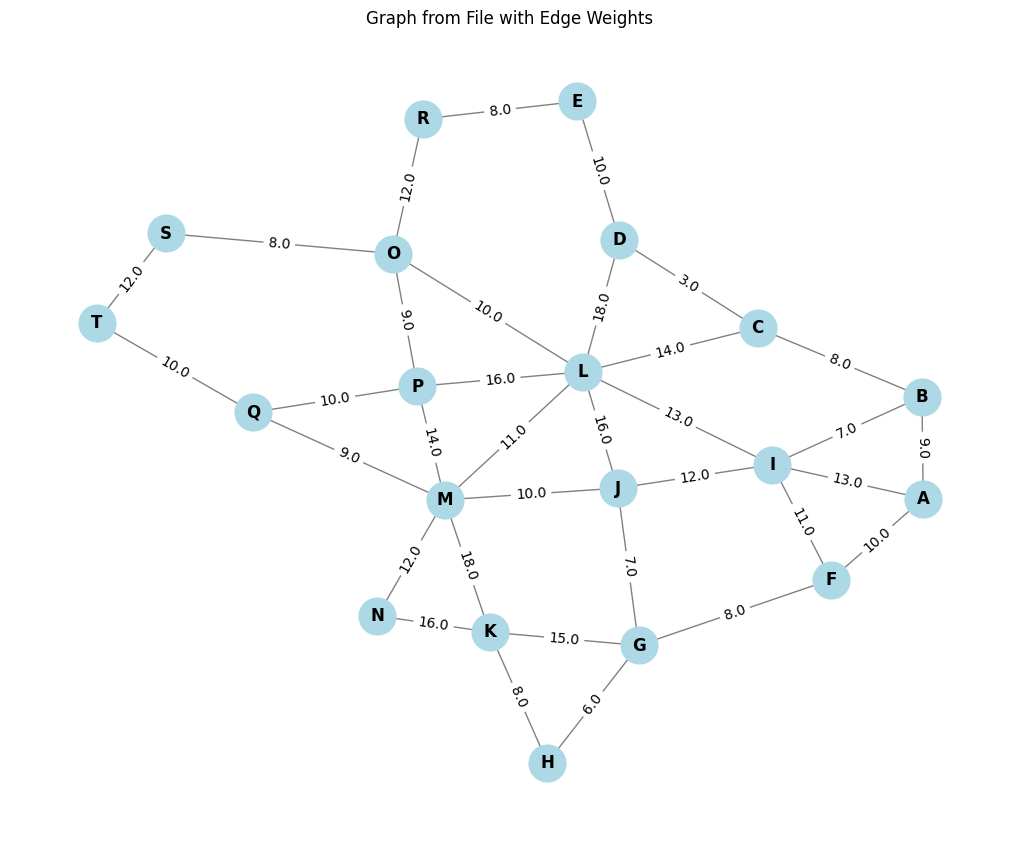

In [1]:
# Exibe o grafo do arquivo graph.txt
from functions import visualizar_grafo
visualizar_grafo("grafo.txt")

In [2]:
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def DFS_limitada(inicial, final, matriz_adj):
    descobertos_t = dict()
    pais_t = dict()
    # O limite aumenta até que a solução seja encontrada
    for limite in range(len(matriz_adj)-1):
        # Obs.: Os nós descobertos não estão sendo revisitados por isso a profundidade 4 falha
        descobertos = []
        # Pilha de vertices a serem explorados
        pilha = []
        # Dicionaro com a profundidade de cada vertice
        profundidade = dict()
        pais = dict()

        # Descobre o vertice inicial e o adiciona na pilha para ser explorado
        descobertos.append(inicial)
        pilha.append(inicial)
        profundidade[inicial] = 0 # Profundidade de vertice inicial é zero

        print(f"Limite: {limite} ------------------------------------")
        if inicial+1 > len(matriz_adj) or final+1 > len(matriz_adj):
            print("Vertice inicial ou final não existe no grafo")
            return []
        while True:
            print("Pilha:", list(map(int_to_letter, incrementar(pilha))))
            # Obtem o primeiro item da pilha
            v = pilha.pop()
            print("Escolhido: ", int_to_letter(v+1))
            vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i not in descobertos]
            print("Vizinhos:", list(map(int_to_letter, incrementar(vizinhos))), "\n")
            # Obtém os vizinhos do vertice v
            if profundidade[v] + 1 <= limite:
                for vizinho in vizinhos:
                    # Descobre cada vizinho
                    descobertos.append(vizinho)
                    profundidade[vizinho] = profundidade[v] + 1
                    pais[vizinho] = v
                    if vizinho == final:
                        descobertos_t[limite] = descobertos
                        pais_t[limite] = pais
                        print("Produndidade da Solução: ", profundidade[final])
                        return descobertos_t, pais_t
                # Adiciona a lista de vizinhos em ordem inversa na pilha
                pilha += vizinhos[::-1]
            if len(pilha) == 0:
                print(f"Profundidade {limite}: Sem Solução!", "\n")
                descobertos_t[limite] = descobertos
                pais_t[limite] = pais
                break

matriz_adj = gerar_matriz_adjacente("grafo.txt")
inicial, final = letter_to_int("G")-1, letter_to_int("S")-1 # Retorna o número correspondente a ordem alfabética

descobertos, pais = DFS_limitada(inicial, final, matriz_adj)

for d in descobertos.keys():
    print(f"Profundidade {d}, ", end="")
    imprimir_resultado(incrementar(descobertos[d]), usarLetras=True)

Limite: 0 ------------------------------------
Pilha: ['G']
Escolhido:  G
Vizinhos: ['F', 'H', 'J', 'K'] 

Profundidade 0: Sem Solução! 

Limite: 1 ------------------------------------
Pilha: ['G']
Escolhido:  G
Vizinhos: ['F', 'H', 'J', 'K'] 

Pilha: ['K', 'J', 'H', 'F']
Escolhido:  F
Vizinhos: ['A', 'I'] 

Pilha: ['K', 'J', 'H']
Escolhido:  H
Vizinhos: [] 

Pilha: ['K', 'J']
Escolhido:  J
Vizinhos: ['I', 'L', 'M'] 

Pilha: ['K']
Escolhido:  K
Vizinhos: ['M', 'N'] 

Profundidade 1: Sem Solução! 

Limite: 2 ------------------------------------
Pilha: ['G']
Escolhido:  G
Vizinhos: ['F', 'H', 'J', 'K'] 

Pilha: ['K', 'J', 'H', 'F']
Escolhido:  F
Vizinhos: ['A', 'I'] 

Pilha: ['K', 'J', 'H', 'I', 'A']
Escolhido:  A
Vizinhos: ['B'] 

Pilha: ['K', 'J', 'H', 'I']
Escolhido:  I
Vizinhos: ['B', 'L'] 

Pilha: ['K', 'J', 'H']
Escolhido:  H
Vizinhos: [] 

Pilha: ['K', 'J']
Escolhido:  J
Vizinhos: ['L', 'M'] 

Pilha: ['K', 'M', 'L']
Escolhido:  L
Vizinhos: ['C', 'D', 'O', 'P'] 

Pilha: ['K', 'M']


Cannot display tree with no edges.


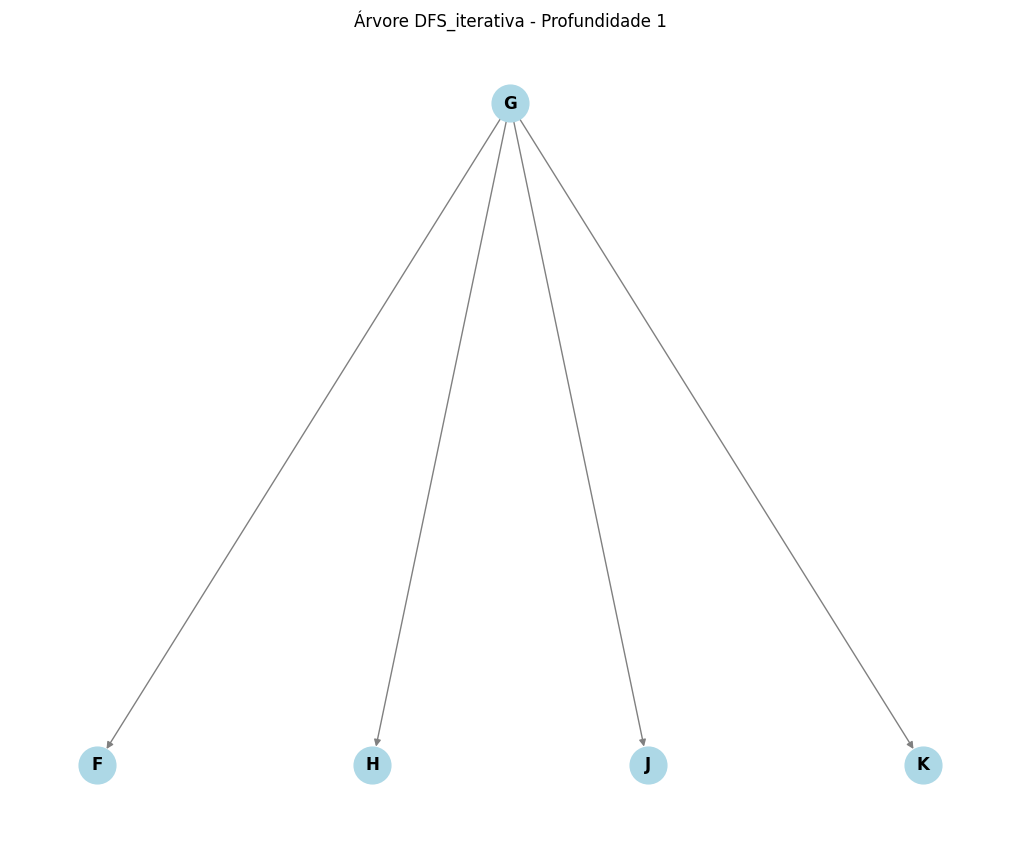

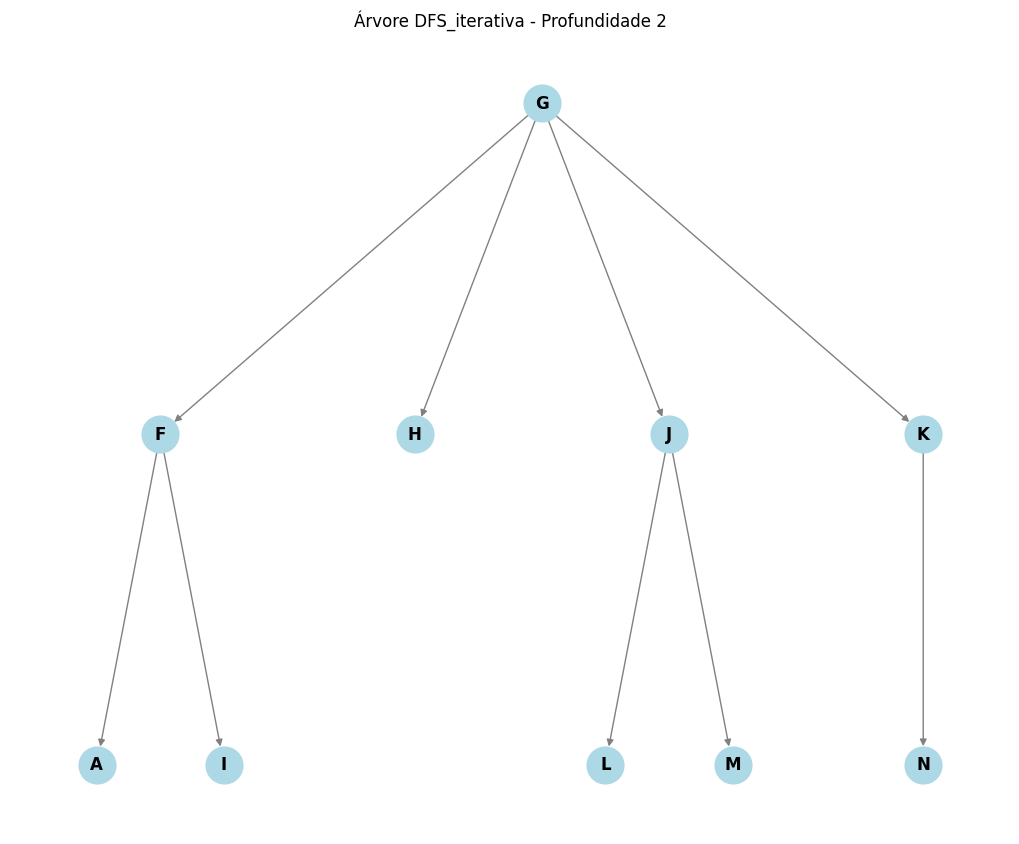

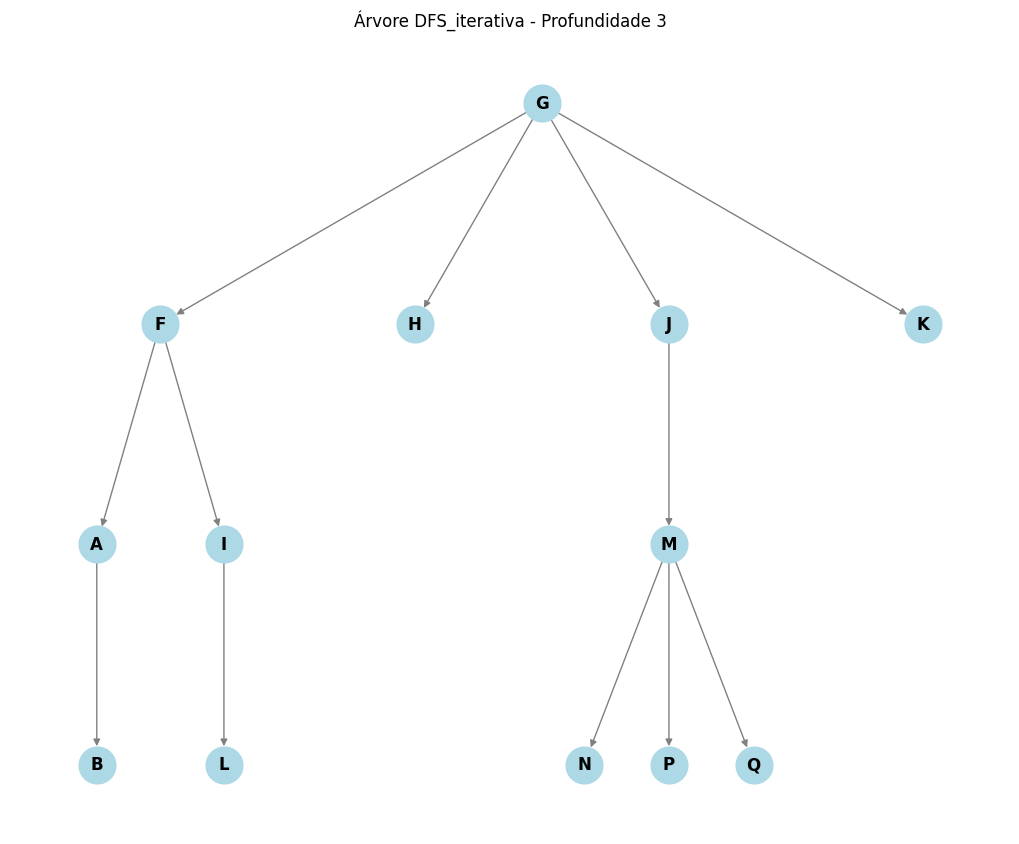

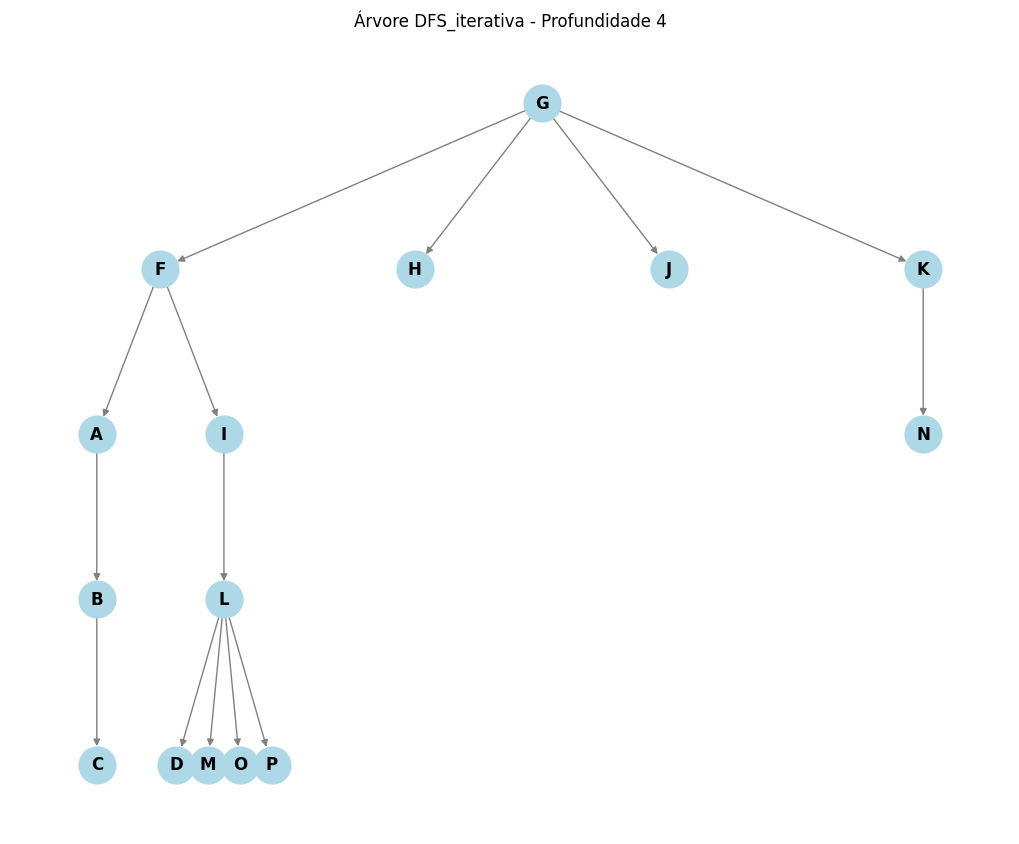

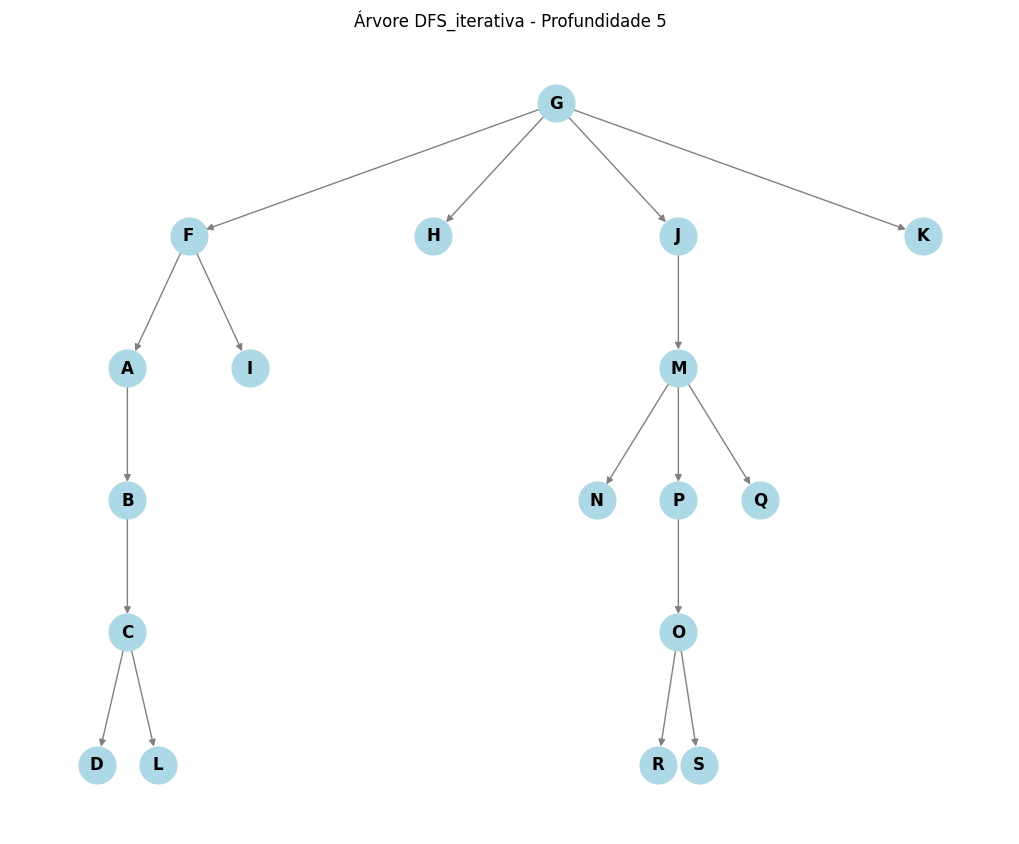

In [3]:
for p in pais.keys():
    visualizar_arvore_de_pais(incrementar(pais[p]), usarLetras=True, titulo=f"Árvore DFS_iterativa - Profundidade {p}")